<a href="https://colab.research.google.com/github/payalpatel1906/website-traffic-analysis/blob/main/webtrafficproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('website_wata.csv')


In [ ]:
df.isnull().sum()

,0
Page Views,0
Session Duration,0
Bounce Rate,0
Traffic Source,0
Time on Page,0
Previous Visits,0
Conversion Rate,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Traffic Source'] = le.fit_transform(df['Traffic Source'])

<Axes: xlabel='Traffic Source'>

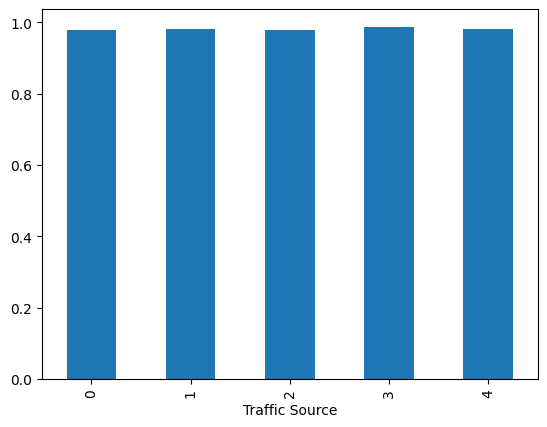

In [ ]:
df.groupby('Traffic Source')['Conversion Rate'].mean().plot(kind='bar')

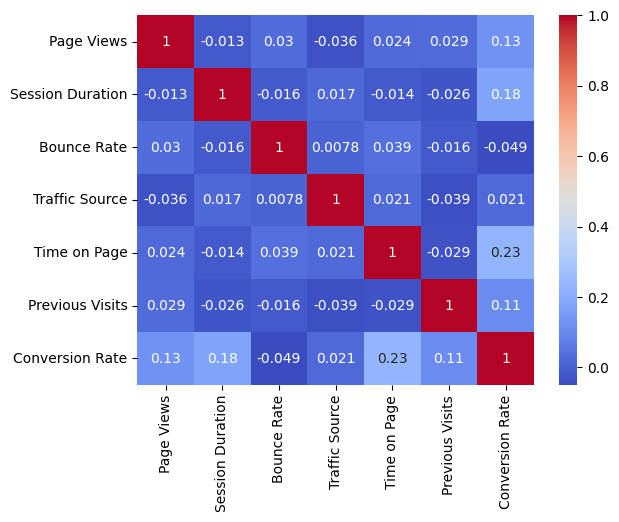

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


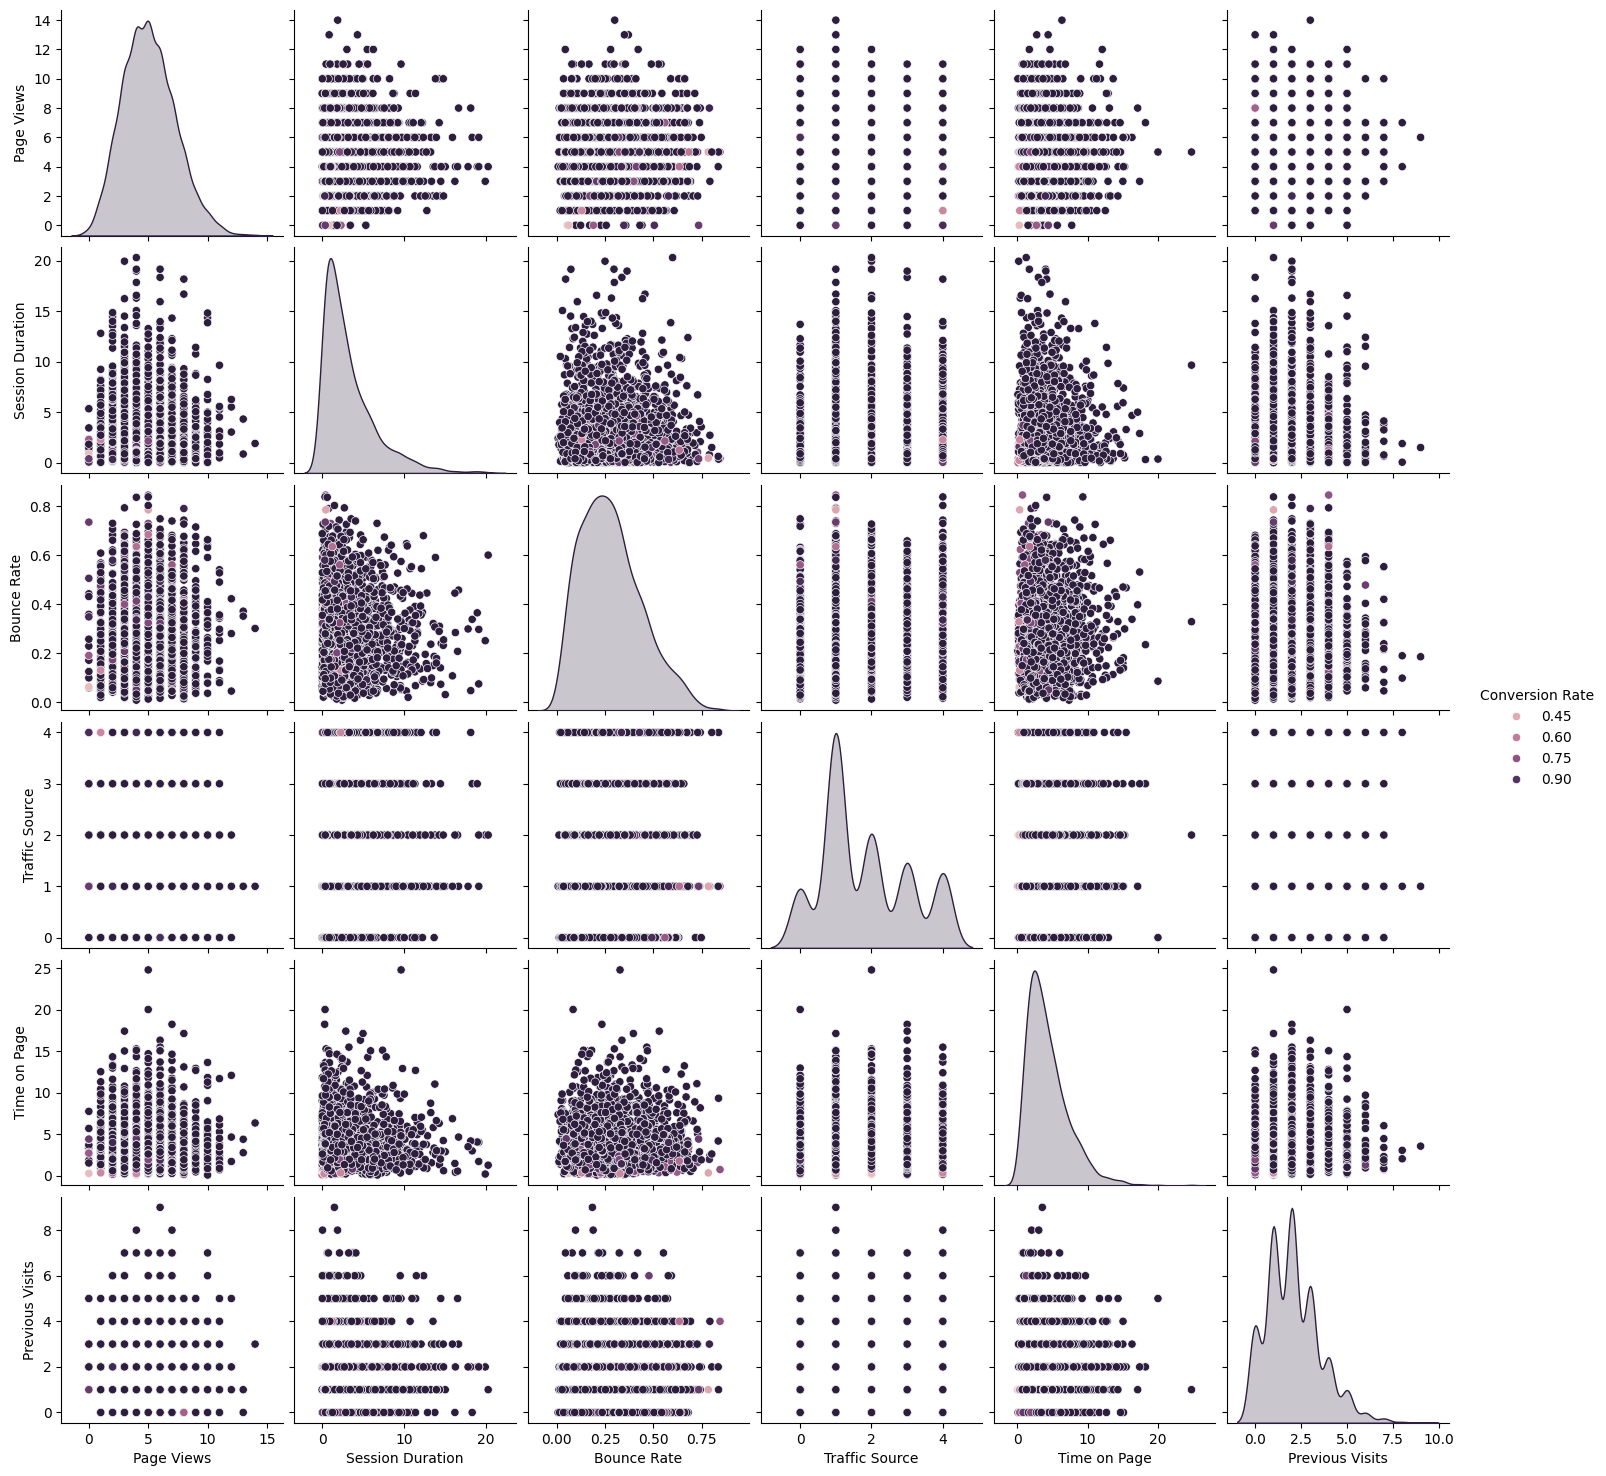

In [ ]:
sns.pairplot(df, hue='Conversion Rate')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Conversion Rate', axis=1)
y = df['Conversion Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[  9  28]
 [ 11 352]]
              precision    recall  f1-score   support

           0       0.45      0.24      0.32        37
           1       0.93      0.97      0.95       363

    accuracy                           0.90       400
   macro avg       0.69      0.61      0.63       400
weighted avg       0.88      0.90      0.89       400

